1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

Загружаем датасет с цветками iris'а

In [2]:
iris = load_iris()

Оставляем два признака - sepal_length и sepal_width и целевую переменную - variety

In [3]:
initial_df = pd.DataFrame(iris.data, columns=iris.feature_names)
data = initial_df[['sepal length (cm)', 'sepal width (cm)']]

variety = iris.target

Разделяем данные на выборку для обучения и тестирования

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25, random_state=815)

Строим модель LDA

In [5]:
lda = LinearDiscriminantAnalysis()

In [6]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
lda.predict(X_test)

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1,
       1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0])

In [8]:
# разница факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,0,0
2,1,2
3,0,0
4,1,2
5,1,2
6,0,0
7,2,2
8,2,2
9,0,0


Классы сбалансированы, используем метрику точности

In [9]:
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

Визуализируем предсказания для тестовой выборки и центры классов

In [10]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-7.52410295,  9.39660233],
       [ 1.7928895 , -3.57912998],
       [ 5.27319816, -5.05935424]])

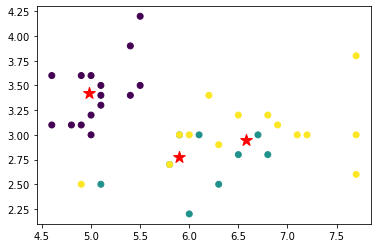

In [11]:
# на визуализации наблюдаем пересечение двух классов
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

Отбрасываем целевую переменную и оставляем только два признака - sepal_length и sepal_width

In [12]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Подберем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

Создадим список для инерции и зададим диапазон кластеров

In [14]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

Визуализируем для подбора оптимального числа кластеров

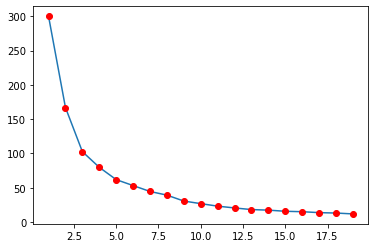

In [15]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia,'ro')

Используем 3 кластера и визуализируем полученную кластеризацию

In [16]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X_scaled)

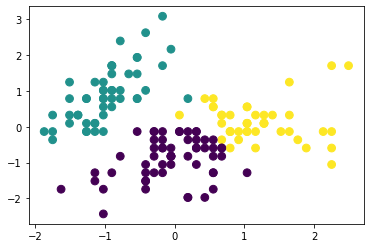

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.show()